In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# cv2.add

In [2]:
# dtype=np.uint8의 의미!!!

a = np.array([[200, 20],
             [200, 40]],
            dtype=np.uint8)

b = np.array([[100, 70],
              [56, 200]],
            dtype=np.uint8)


result = a+b
result_2 = cv2.add(a, b)

print(result)
print(result_2)

[[ 44  90]
 [  0 240]]
[[255  90]
 [255 240]]


<AxesSubplot:>

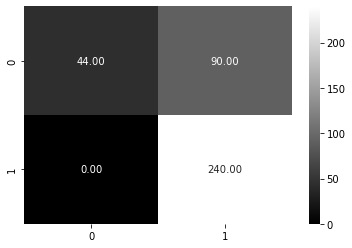

In [3]:
# fmt = '.2f'의 의미!!!

sns.heatmap(result, annot = True, fmt = '.2f', cmap=plt.cm.gray)

<AxesSubplot:>

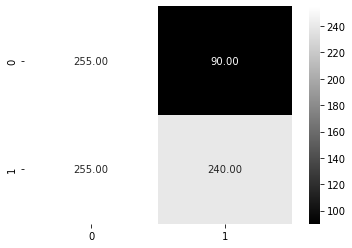

In [4]:
sns.heatmap(result_2, annot = True, fmt = '.2f', cmap=plt.cm.gray)

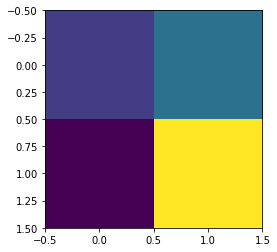

In [5]:
plt.imshow(result)

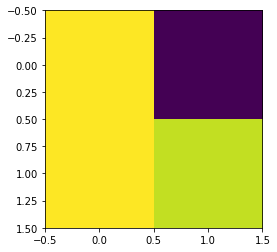

In [6]:
plt.imshow(result_2)

In [7]:
result[1]

array([  0, 240], dtype=uint8)

In [8]:
result_2[1]

array([255, 240], dtype=uint8)

# Mask

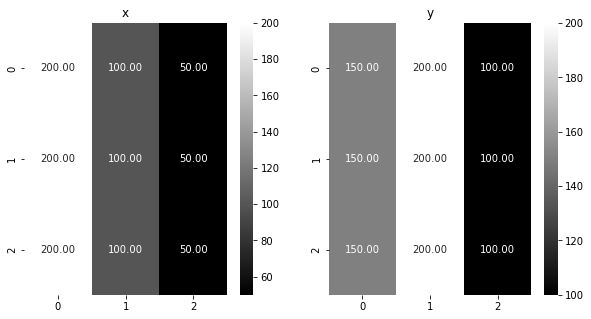

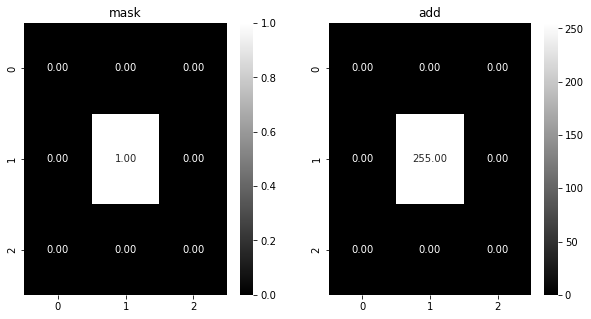

In [15]:
def draw_subheatmap(title_0, img_0, title_1, img_1):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.gca().set_title(title_0)
    sns.heatmap(img_0,annot=True,fmt='.2f',cmap=plt.cm.gray)
    plt.subplot(122)
    plt.gca().set_title(title_1)
    sns.heatmap(img_1,annot=True, fmt='.2f', cmap=plt.cm.gray)


x = np.array([[200,100,50],
              [200,100,50],
              [200,100,50]],
             dtype=np.uint8)
y = np.array([[150,200,100],
              [150,200,100],
              [150,200,100]],
             dtype=np.uint8
             )

mask = np.zeros(shape=(3,3), dtype=np.uint8)
mask[1,1] = 1

draw_subheatmap('x',x,'y',y)

r = np.zeros(shape=(3,3), dtype=np.uint8)
result = cv2.add(x, y, r, mask=mask)

draw_subheatmap('mask',mask,'add',result)

# Image blending

This is also image addtion, but different weights are given to images so that it gives a feeling of blending or trasparency. Images are added as per the equation below:

$$
g(x) = (1-\alpha) f_0 (x) + \alpha f_1 (x)
$$

By varing $\alpha$ from 0 to 1, you can perform a cool transition b/w one image to another

## Alpha blending

In [ ]:
import os

fstr_0 = os.path.join('~~')
fstr_1 = os.path.join('~~~')

img_0 = cv2.imread(fstr_0)
img_1 = cv2.imread(fstr_1)
img_0 = cv2.resize(img_0, dsize=(img_1.shape[1],img_1.shape[0]), interpolation= cv2.INTER_AREA)
print(img_0.shape)
print(img_1.shape)



# alpha blending (weight = 0.5)
dst = cv2.addWeighted(img_0,0.5, img_1,0.5,0)



plt.imshow(dst[:,:,::-1])
plt.axis('off')
plt.show()

# cv2.imshow('dst',dst)
# cv2.waitKey(0)
# cv2.destroyWindow('dst')

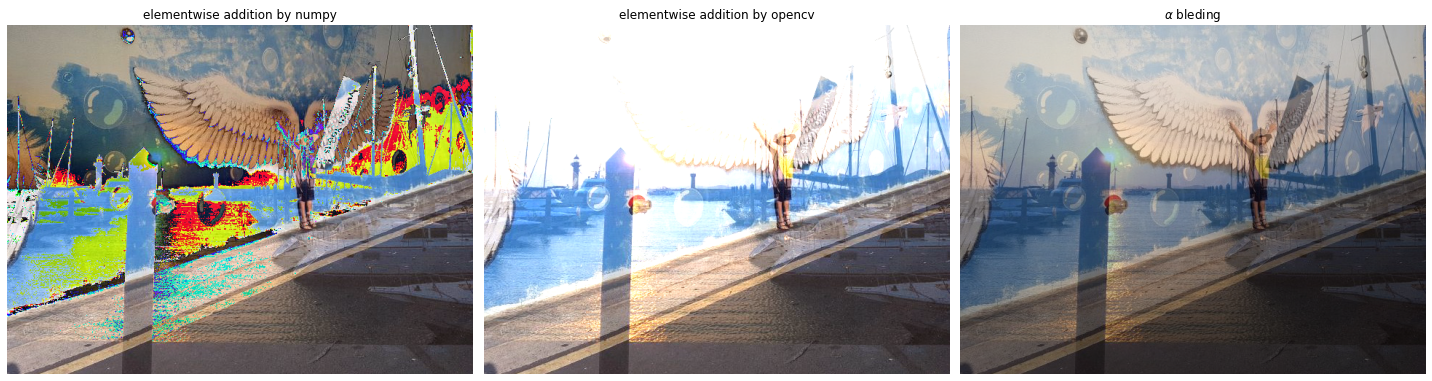

cv2.addWeighted 함수의 인자가 (imgA, a, imgB,b, c)라고 한다면 산술식은 다음과 같습니다.

result = imgA * a + imgB * b + c

In [21]:
a = np.array([[200, 100, 30], [50, 210, 44]])

print(a)
print('================')
print(a[:, ::-1])

[[200 100  30]
 [ 50 210  44]]
[[ 30 100 200]
 [ 44 210  50]]


# +추가

import ipywidgets as widgets

interact(Intslider(min=0, max=0, ...)) #ipywidgets 좀 더 찾아볼 것.

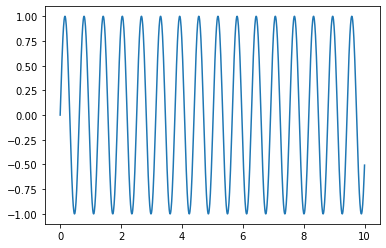

In [28]:
import sys

!{sys.executable} -m pip install ipywidgets

import ipywidgets as widgets

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

def f(k):
    x = np.linspace(0, 10, num=1000)
    y = np.sin(k*x)
    
    plt.plot(x, y)
    
    plt.show()
    
#interact(f, k=(0.0,5.0,0.1) )
interact(f, k=widgets.IntSlider(min=0, max=100, step=10, value=10, continuous_update=False));

# Bitwise operations

This includes bitwise **AND**, **OR**, **NOT** and **XOR** operations. 
* They will be highly useful while **extracting any part of the image**
* defining and working with non-rectangular ROI etc.

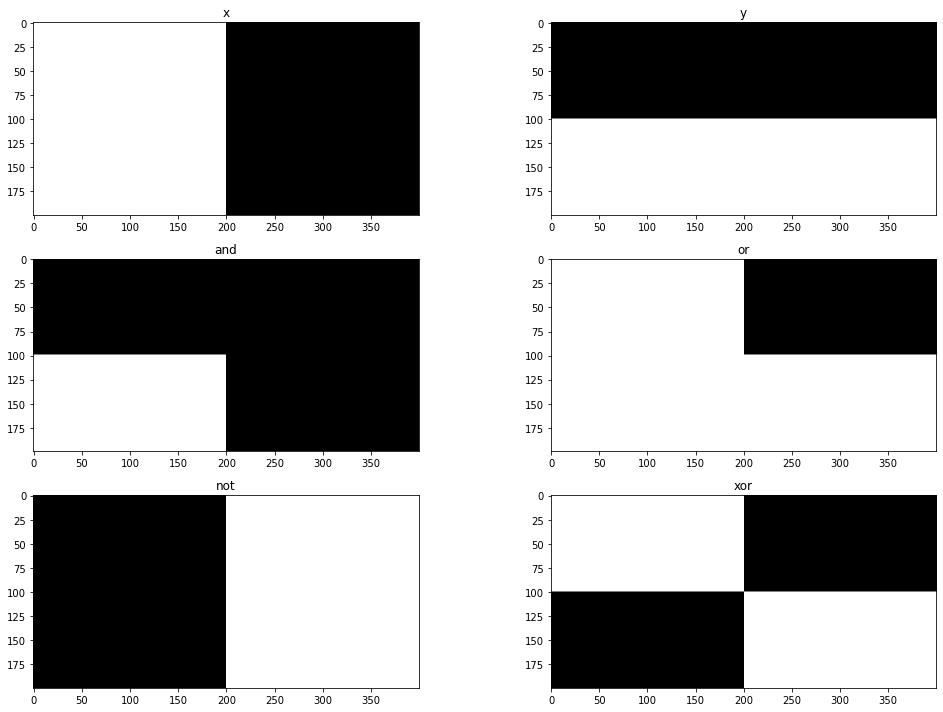

In [29]:
img_0 = np.zeros( shape=(200,400), dtype=np.uint8)
img_1 = np.zeros( shape=(200,400), dtype=np.uint8)

img_0[:,:200] = 255
img_1[100:200,:] = 255

bit_op_and = cv2.bitwise_and(img_0,img_1)
bit_op_or  = cv2.bitwise_or (img_0,img_1)
bit_op_not = cv2.bitwise_not(img_0)
bit_op_xor = cv2.bitwise_xor(img_0,img_1)

imgs = {'x':img_0, 'y':img_1, 'and':bit_op_and, 'or':bit_op_or, 'not':bit_op_not, 'xor':bit_op_xor}
plt.figure(figsize=(15,10))
for idx, (title,img) in enumerate(imgs.items()):
  plt.subplot(3,2,idx+1)
  plt.title(title)
  plt.imshow(img, cmap=plt.cm.gray)
  #plt.axis('off')
plt.tight_layout()
plt.show()

## 꼭 해 볼 것!!!!

In [ ]:
fstr_0 = os.path.join(colab_path,'messi5.jpg')
fstr_1 = os.path.join(colab_path,'opencv_logo.png')

img_0 = cv2.imread(fstr_0)
img_1 = cv2.imread(fstr_1,cv2.IMREAD_UNCHANGED)

_, mask  = cv2.threshold(img_1[:,:,3], 1,255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGRA2BGR)
rows, cols, channels = img_1.shape
roi = img_0[0:rows, 0:cols]


# bitwise_and 중요!!!!!!!!

masked_fg = cv2.bitwise_and(img_1, img_1, mask=mask)
masked_bg = cv2.bitwise_and(roi,   roi, mask=mask_inv)


added_roi = masked_fg+masked_bg
img_0[0:rows, 0:cols] = added_roi

cv2_imshow(mask)
cv2_imshow(mask_inv)
cv2_imshow(masked_fg)
cv2_imshow(masked_bg)
cv2_imshow(img_0)

# ==================================

# 과제

### 서명이 하나 있고, 종이가 하나 있음.    
### 서명을 카메라로 찍어서 이미지화시킨 다음에, 그 부분을 잘라내서 다른 이미지 위에 이미지화 시켜보기

foreground = 1인 mask, background = 1인 mask를 잘 활용하기

## Alpha blending이 쉽긴 하지만, bitwise 연산을 사용할 것.
## mask가 2개 필요할 것임.